In [1]:
import numpy as np
import gmpy2
import gmpy2.gmpy2
from gmpy2 import mpfr
import copy
import pickle
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
import matplotlib.image as mpimg
import matplotlib.lines as mlines

# custom made packages
from sys import path
path.append('./../')
import src as pnp
import src.constants as constants

from importlib import reload

In [2]:
df = pnp.load_parameter_overview()
df

found files:  ['results_test_run1.pcl', 'results_test_run0.pcl', 'results_test_run2.pcl', 'results_test_run6.pcl', 'results_test_run7.pcl', 'results_test_run5.pcl', 'results_test_run11.pcl', 'results_test_run10.pcl', 'results_test_run3.pcl']
open : /home/work/Projects/spineIonConcentrations/results/results_test_run1.pcl


,domain,membrane_potential,d_phi_in,d_phi_ext,d_phi_in_min,d_phi_in_max,d_phi_ext_min,d_phi_ext_max,r_in,r_mem,...,chem_f_pos_in,chem_f_pos_ext,chem_f_neg_in,chem_f_neg_ext,pnp_lhs_in,pnp_lhs_ext,pnp_rhs_in,pnp_rhs_ext,date,experiment_id
experiment_id,,,,,,,,,,,,,,,,,,,,,
0,head,-0.071,-7.4989241420280345176255633782207231705843838...,-0.0257889874913037091958001312264059379231184...,-1.2618984341147823288742380043458979343995451...,-7.4256878542530106029895264896367734763771295...,-4.4627299448781386106597534944921154270610540...,-0.0259965313910217337214914046228386723669245...,2.000000e-08,2.500000e-08,...,-3.975788e+07,9.002236,3.975791e+07,-3.975788e+07,0.0,0.0,0.0,0.0,2020-08-28 15:05:47.884220,0
1,head,-0.070,-7.5017200047959541478591963381282518359479715...,-0.0257810129295329360649136063443620514590293...,-1.2618984341147823288742380043458979343995451...,-7.4285358617383247942234092420221713837236166...,-4.4627299448781386106597534944921154270610540...,-0.0259885085857113855636879584665166476042941...,2.000000e-08,2.500000e-08,...,-3.977957e+07,8.952676,3.977960e+07,-3.977957e+07,0.0,0.0,0.0,0.0,2020-08-28 15:06:27.925538,1
2,head,-0.069,-7.5045147544015075417197046774637506981999073...,-0.0257730377401511164675573795079799310769885...,-1.2618984341147823288742380043458979343995451...,-7.4313827170506118607873347059467050712555646...,-4.4627299448781386106597534944921154270610540...,-0.0259804851551189085537285627935943921329453...,2.000000e-08,2.500000e-08,...,-3.980126e+07,8.451528,3.980129e+07,-3.980126e+07,0.0,0.0,0.0,0.0,2020-08-28 15:06:22.738278,2
3,head,-0.036,-7.5961173766653066741859056751673863312399113...,-0.0255095149378398295542114126988053612876683...,-1.2618984341147823288742380043458979343995451...,-7.5246866711330909899269059337711951229721307...,-4.4627299448781386106597534944921154270610540...,-0.0257153614872918297520887342955120402621105...,2.000000e-08,2.500000e-08,...,-4.051649e+07,11.624314,4.051652e+07,-4.051649e+07,0.0,0.0,0.0,0.0,2020-08-28 15:06:27.125418,3
4,head,-0.035,-7.5988743433346827662842673005640079819483675...,-0.0255015192811233155217864876362909853924065...,-1.2618984341147823288742380043458979343995451...,-7.5274947243752967501739803424243291374295949...,-4.4627299448781386106597534944921154270610540...,-0.0257073168267753731849878384707608347525820...,2.000000e-08,2.500000e-08,...,-4.053815e+07,6.228888,4.053818e+07,-4.053815e+07,0.0,0.0,0.0,0.0,2020-08-28 15:06:28.366764,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,neck,0.000,-1.7295675971588218670926817566169120254926383...,-0.02531717531383037567138671875,-2.8061802498996257781982421875000000000000000...,-1.7141205258667469024658203125000000000000000...,1.92545223133591157379967091599191587252594544...,-0.0255279188975691795349121093749999999999999...,1.000000e-08,1.500000e-08,...,-4.130112e+07,-94239.868685,4.130115e+07,-4.130112e+07,0.0,0.0,0.0,0.0,2020-09-03 14:40:30.471610,139
140,neck,0.001,-1.7301877113695784786429054946665928582660853...,-0.0253086615353822708129882812499999999999999...,-2.8061802498996257781982421875000000000000000...,-1.7147333361208438873291015625000000000000000...,1.92545223133591157379967091599191587252594544...,-0.0255196062847971916198730468749999999999999...,1.000000e-08,1.500000e-08,...,-4.132311e+07,23029.412158,4.132314e+07,-4.132311e+07,0.0,0.0,0.0,0.0,2020-09-03 14:40:27.872728,140
141,neck,0.034,-1.7499060046580965956108943970548352808691561...,-0.02503578551113605499267578125,-2.8061802498996257781982421875000000000000000...,-1.7348212189972400665283203125e-06,1.92545223133591157379967091599191587252594544...,-0.025244918651878833770751953125,1.000000e-08,1.500000e-08,...,-4.202657e+07,17309.778803,4.202661e+07,-4.202657e+07,0.0,0.0,0.0,0.0,2020-09-03 14:40:30.486039,141


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


domain                 neck
membrane_potential    -0.07
r_in                  2e-08
Name: 61, dtype: object


domain                 neck
membrane_potential    0.035
r_in                  2e-08
Name: 70, dtype: object


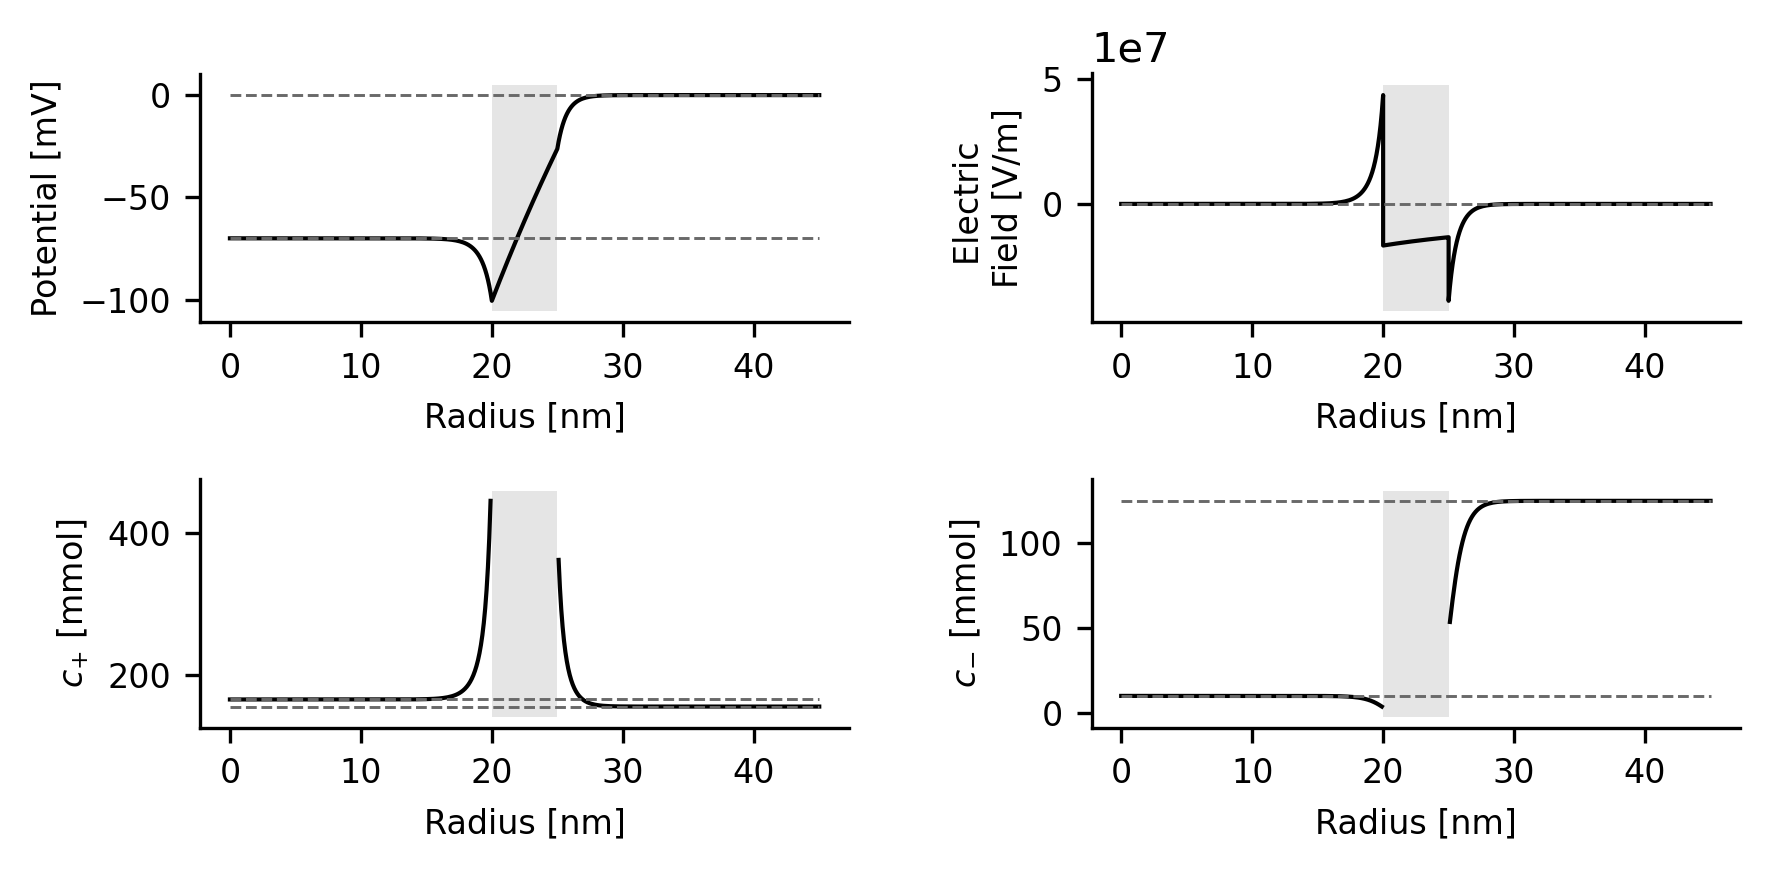

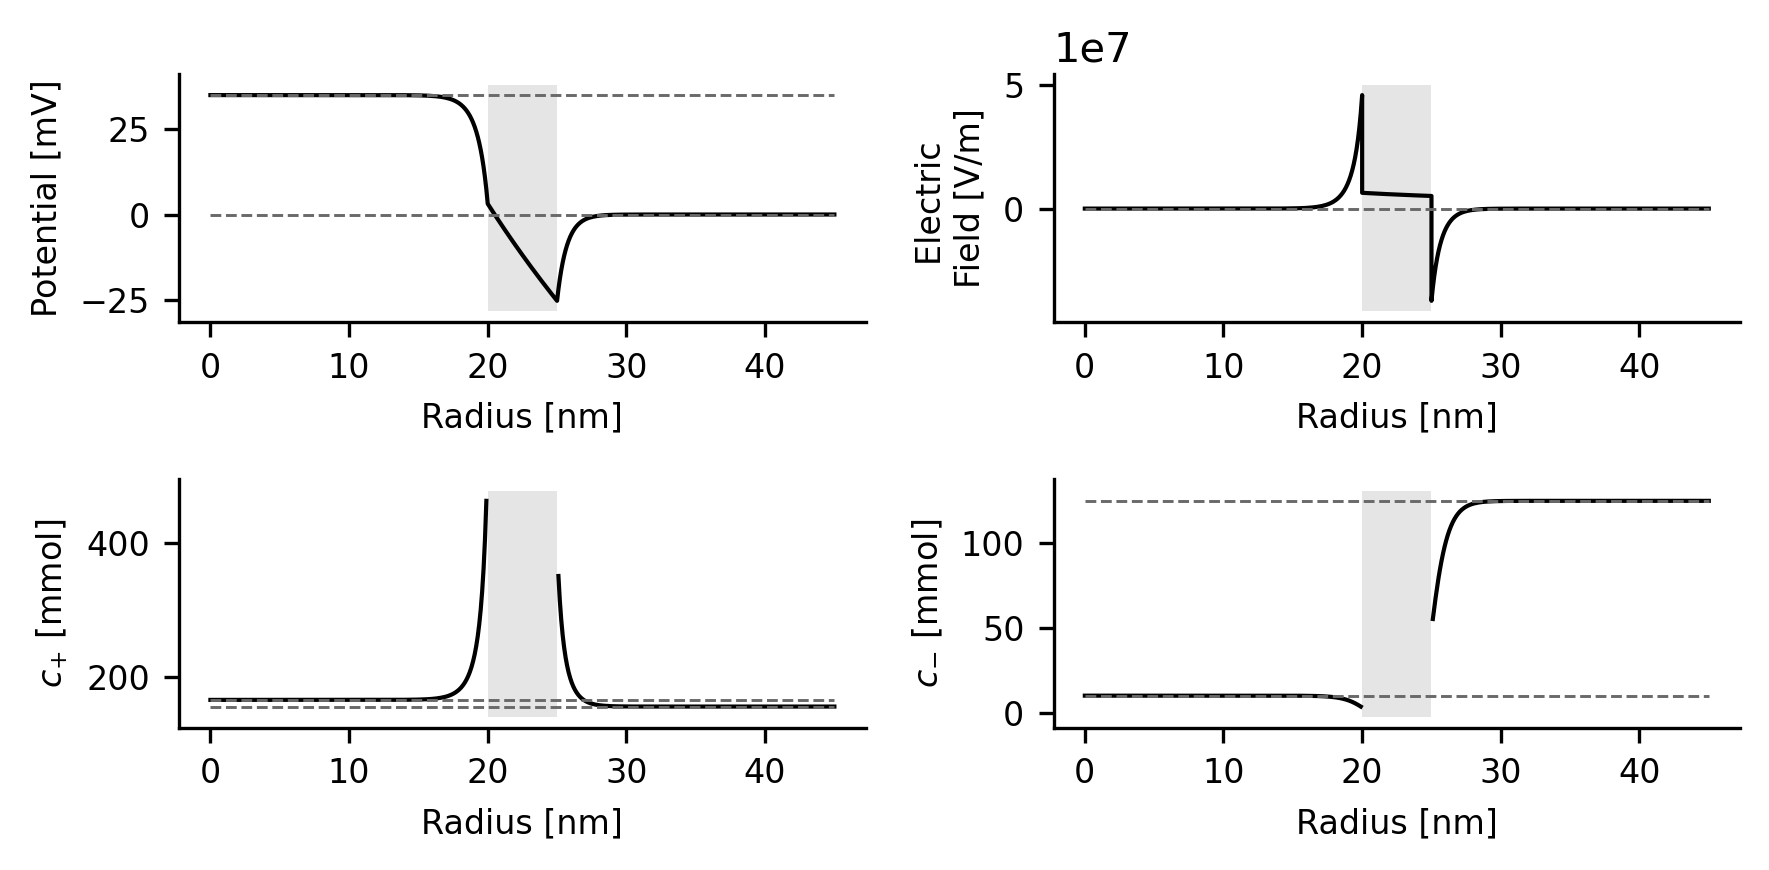

In [3]:
index1 = 61
solution1 = pnp.load_domain_from_df(df, index1)
print(df.loc[index1, ['domain', 'membrane_potential', 'r_in']])
print('\n')
index2 = 70
solution2 = pnp.load_domain_from_df(df, index2)
print(df.loc[index2, ['domain', 'membrane_potential', 'r_in']])

pnp.plot_domain_overview(solution1, mask_extracellular_space=False)
pnp.plot_domain_overview(solution2, mask_extracellular_space=False)

In [4]:
r_1 = solution1.get_grid_points()
v_mem_1 = solution1.get_electric_potential() * 1000.
c_pos_1 = solution1.get_concentration_positive()
c_neg_1 = solution1.get_concentration_negative()
c_back_1 = solution1.get_concentration_background()

r_2 = solution2.get_grid_points()
v_mem_2 = solution2.get_electric_potential() * 1000.
c_pos_2 = solution2.get_concentration_positive()
c_neg_2 = solution2.get_concentration_negative()
c_back_2 = solution2.get_concentration_background()

np.all(r_1 == r_2)

True

# A

In [5]:
# search for solution that match certain criteria

param_dict = {'membrane_potential': -0.07, 'domain': 'neck', 'r_in': 2e-8}
ids = pnp.search_index(df, param_dict)
print(ids)
print('########')
param_dict = { 'domain': 'neck', 'r_in': 2e-8}
ids = pnp.search_index(df, param_dict)
print(df.loc[ids, 'membrane_potential'])

# ids = [61, 64, 67, 70]

Int64Index([61], dtype='int64', name='experiment_id')
########
experiment_id
60   -0.071
61   -0.070
62   -0.069
63   -0.036
64   -0.035
65   -0.034
66   -0.001
67    0.000
68    0.001
69    0.034
70    0.035
71    0.036
Name: membrane_potential, dtype: float64


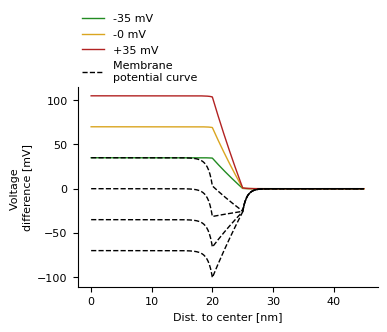

In [6]:
def voltage_drop_along_cylinder_axis(fig, pos, index_ref, index1, index2, index3):

    solution_reference = pnp.load_domain_from_df(df, index_ref)
    r__ref = solution_reference.get_grid_points() * 1.e9
    v_mem_ref = solution_reference.get_electric_potential() * 1000.
    v_mem_ref = v_mem_ref - v_mem_ref[-1]
    
    solution1 = pnp.load_domain_from_df(df, index1)
    r_1 = solution1.get_grid_points() * 1.e9
    v_mem_1 = solution1.get_electric_potential() * 1000.
    v_mem_1 = v_mem_1 - v_mem_1[-1]
    
    solution2 = pnp.load_domain_from_df(df, index2)
    r_2 = solution2.get_grid_points() * 1.e9
    v_mem_2 = solution2.get_electric_potential() * 1000.
    v_mem_2 = v_mem_2 - v_mem_2[-1]
    
    solution3 = pnp.load_domain_from_df(df, index3)
    r_3 = solution3.get_grid_points() * 1.e9
    v_mem_3 = solution3.get_electric_potential() * 1000.
    v_mem_3 = v_mem_3 - v_mem_3[-1]
    
    v_diff_1 = v_mem_1 - v_mem_ref
    v_diff_2 = v_mem_2 - v_mem_ref
    v_diff_3 = v_mem_3 - v_mem_ref
    
    ax = fig.add_axes(pos)
    ax.plot(r_1, v_diff_1, label='-35 mV', c='forestgreen', lw=1.)
    ax.plot(r_1, v_diff_2, label='-0 mV', c='goldenrod', lw=1.)
    ax.plot(r_1, v_diff_3, label='+35 mV', c='firebrick', lw=1.)
    
    ax.plot(r_1, v_mem_1,  c='black', lw=1, ls='--',label='Membrane \npotential curve')
    ax.plot(r_1, v_mem_2, c='black', lw=1, ls='--')
    ax.plot(r_1, v_mem_3, c='black', lw=1, ls='--')
    ax.plot(r_1, v_mem_ref, c='black', lw=1, ls='--')
    

    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_ylabel('Voltage \ndifference [mV]', fontsize=8)
    ax.set_xlabel('Dist. to center [nm]', fontsize=8)
    
    ax.tick_params(labelsize=8)
    
    ax.legend(fontsize=8, frameon=False, ncol=1, loc=(.0, 1.0))
    

fig = plt.figure(dpi=100, figsize=(3,2))
pos = [0,0,1,1]
voltage_drop_along_cylinder_axis(fig, pos, index_ref=61, index1=64, index2=67, index3=70)

plt.show()

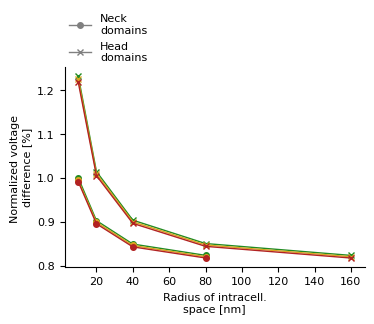

In [7]:
def max_voltage_drop_along_cylinder_axis(fig, pos):
    """
    compute difference of voltage traces as in voltage_drop_along_cylinder_axis and compute
    max difference in intracellular space with respect to rest for depolarized membranes
    EXCLUDE DEBYE LAYER OF 1NM FROM ANALYSIS
    
    domain, radius, membrane
    
    x-axis: radius of intracelluarl space
    y-axis: max diff value
    
    """
    ax = fig.add_axes(pos)
    
    for marker ,domain in zip(['x','o'],['head', 'neck']):
        
        
        
        for color, v_mem in zip(['forestgreen','goldenrod','firebrick'],[-0.035, 0.00, 0.035]):

            vds = []

            if domain == 'head':  
                r_vals =  [1.e-8, 2.e-8, 4.e-8, 8.e-8, 16.e-8,]
            else:
                r_vals =  [1.e-8, 2.e-8, 4.e-8, 8.e-8,]
            for r_in in r_vals:
                param_ref = {'membrane_potential': -0.07, 'domain': domain, 'r_in': r_in}
                param_1 = {'membrane_potential': v_mem, 'domain': domain, 'r_in': r_in}

                index_ref = pnp.search_index(df, param_ref).values[0]
                index1 = pnp.search_index(df, param_1).values[0]

                #print(index_ref)
                solution_reference = pnp.load_domain_from_df(df, index_ref)
                r_ref = solution_reference.get_grid_points() * 1.e9
                v_mem_ref = solution_reference.get_electric_potential() * 1000.
                nx = solution_reference.get_res_in() -1
                # exclude layer at membrane
                deb_l = 0.0 # nm see fig 2
                nx =  np.max(np.where(r_ref[:nx]< (r_in*1.e9-deb_l)))
                
                solution1 = pnp.load_domain_from_df(df, index1)
                r_1 = solution1.get_grid_points() * 1.e9
                v_mem_1 = solution1.get_electric_potential() * 1000.


                # compute max diff in intacell space
                vd = (v_mem_ref - v_mem_1)[:nx]
                vd = np.max(vd) - np.min(vd)
                vds.append(vd)
            
            # normalize 
            vds = np.array(vds) / (70+v_mem*1000) *100 # to percent
            
            ax.plot(np.array(r_vals)*1.e9,vds, color=color, marker=marker, lw=1., ms=4.)
            
        ax.set_xlabel('Radius of intracell.\nspace [nm]', fontsize=8)
        ax.set_ylabel('Normalized voltage \ndifference [%]', fontsize=8)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        ax.tick_params(labelsize=8)
        
        # LEGEND
        from matplotlib.lines import Line2D
        custom_lines = [
            Line2D([0], [0], color='gray', lw=1, ms=4, marker='o'),
            Line2D([0], [0], color='gray', lw=1, ms=4, marker='x'),
            ]
        ax.legend(custom_lines, ['Neck\ndomains', 'Head\ndomains', ], frameon=False, loc=(0.,1.), fontsize=8)
    
fig = plt.figure(dpi=100, figsize=(3,2))
pos = [0,0,1,1]
max_voltage_drop_along_cylinder_axis(fig, pos)

plt.show()

<ipython-input-8-cc0aa0bb7976>:24: RuntimeWarning: invalid value encountered in true_divide
  c_pos_diff = (c_pos_2 - c_pos_1) / c_pos_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:25: RuntimeWarning: invalid value encountered in true_divide
  c_neg_diff = (c_neg_2 - c_neg_1) / c_neg_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:24: RuntimeWarning: invalid value encountered in true_divide
  c_pos_diff = (c_pos_2 - c_pos_1) / c_pos_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:25: RuntimeWarning: invalid value encountered in true_divide
  c_neg_diff = (c_neg_2 - c_neg_1) / c_neg_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:24: RuntimeWarning: invalid value encountered in true_divide
  c_pos_diff = (c_pos_2 - c_pos_1) / c_pos_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:25: RuntimeWarning: invalid value encountered in true_divide
  c_neg_diff = (c_neg_2 - c_neg_1) / c_neg_2 * 100. # [%]


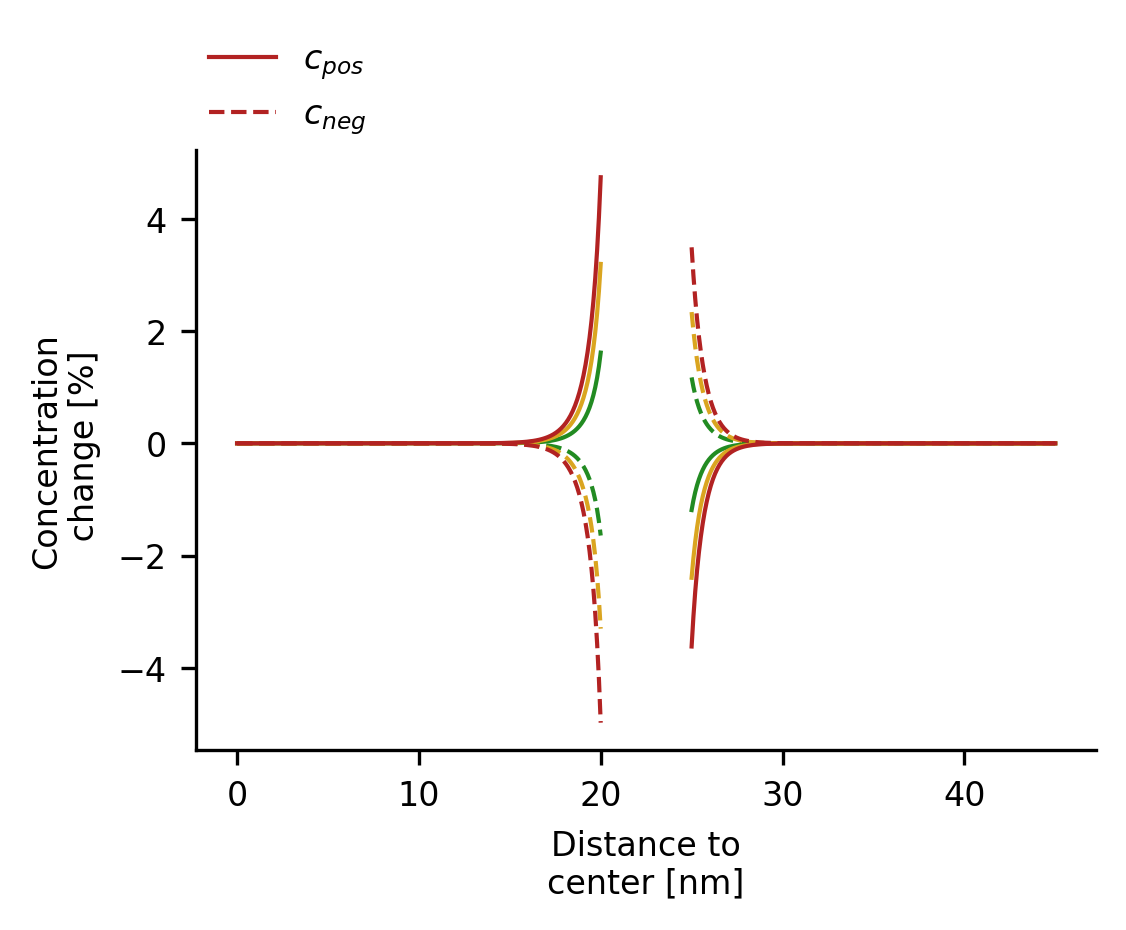

In [8]:
def concentration_changes(fig, pos, index1, index2, index3=None, index4=None):
    ax = fig.add_axes(pos)
    domain = 'neck'
    r_in = 2.e-8
    for color, v_mem in zip(['forestgreen','goldenrod','firebrick'],[-0.035, 0.00, 0.035]):

        param_ref = {'membrane_potential': -0.07, 'domain': domain, 'r_in': r_in}
        param_1 = {'membrane_potential': v_mem, 'domain': domain, 'r_in': r_in}

        index_ref = pnp.search_index(df, param_ref).values[0]
        index1 = pnp.search_index(df, param_1).values[0]

        #print(index_ref)
        solution_reference = pnp.load_domain_from_df(df, index_ref)
        r_1 = solution_reference.get_grid_points()
        c_pos_1 = solution_reference.get_concentration_positive()
        c_neg_1 = solution_reference.get_concentration_negative()

        solution2 = pnp.load_domain_from_df(df, index1)
        r_2 = solution2.get_grid_points()
        c_pos_2 = solution2.get_concentration_positive()
        c_neg_2 = solution2.get_concentration_negative()

        c_pos_diff = (c_pos_2 - c_pos_1) / c_pos_2 * 100. # [%]
        c_neg_diff = (c_neg_2 - c_neg_1) / c_neg_2 * 100. # [%]
        r_1 = r_1 * 1.e9
        r_2 = r_2 * 1.e9
        
        if color == 'firebrick':
            ax.plot(r_1,c_pos_diff, label='$c_{pos}$', c=color, lw=1,)
            ax.plot(r_1, c_neg_diff, label='$c_{neg}$', c=color, ls='--', lw=1)
        else:
            ax.plot(r_1,c_pos_diff,c=color, lw=1)
            ax.plot(r_1, c_neg_diff, c=color, ls='--', lw=1)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_ylabel('Concentration\n change [%]', fontsize=8)
    ax.set_xlabel('Distance to\ncenter [nm]', fontsize=8)
    
    ax.tick_params(labelsize=8)
    
    ax.legend(fontsize=8, frameon=False, loc=(0.,1.))
    
fig = plt.figure(dpi=300, figsize=(3,2))
pos = [0,0,1,1]
concentration_changes(fig, pos, index1=61, index2=70)

plt.show()

<ipython-input-8-cc0aa0bb7976>:24: RuntimeWarning: invalid value encountered in true_divide
  c_pos_diff = (c_pos_2 - c_pos_1) / c_pos_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:25: RuntimeWarning: invalid value encountered in true_divide
  c_neg_diff = (c_neg_2 - c_neg_1) / c_neg_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:24: RuntimeWarning: invalid value encountered in true_divide
  c_pos_diff = (c_pos_2 - c_pos_1) / c_pos_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:25: RuntimeWarning: invalid value encountered in true_divide
  c_neg_diff = (c_neg_2 - c_neg_1) / c_neg_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:24: RuntimeWarning: invalid value encountered in true_divide
  c_pos_diff = (c_pos_2 - c_pos_1) / c_pos_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:25: RuntimeWarning: invalid value encountered in true_divide
  c_neg_diff = (c_neg_2 - c_neg_1) / c_neg_2 * 100. # [%]


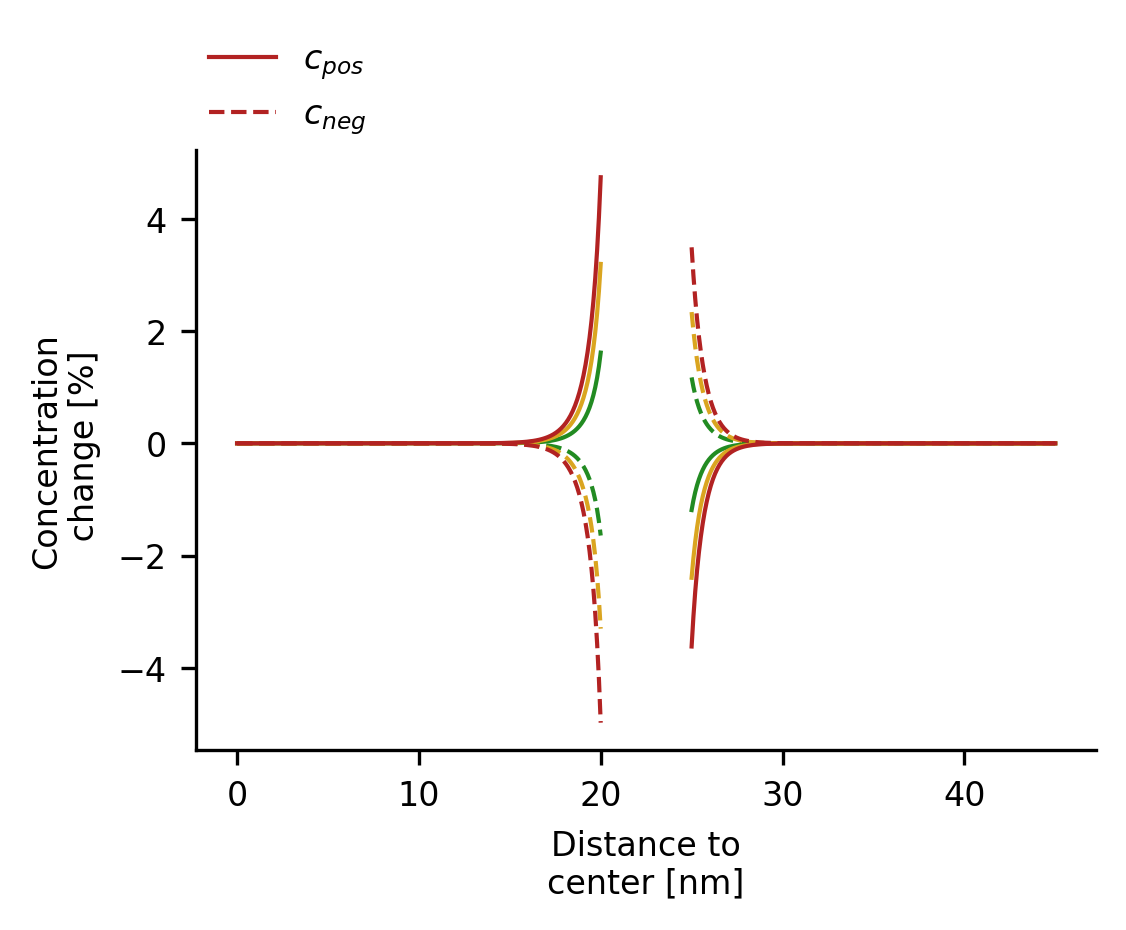

In [9]:
def concentration_changes___(fig, pos, index1, index2, index3=None, index4=None):

    solution1 = pnp.load_domain_from_df(df, index1)
    r_1 = solution1.get_grid_points()
    c_pos_1 = solution1.get_concentration_positive()
    c_neg_1 = solution1.get_concentration_negative()
    
    solution2 = pnp.load_domain_from_df(df, index2)
    r_2 = solution2.get_grid_points()
    c_pos_2 = solution2.get_concentration_positive()
    c_neg_2 = solution2.get_concentration_negative()
    
    c_pos_diff = (c_pos_2 - c_pos_1) / c_pos_2 * 100. # [%]
    c_neg_diff = (c_neg_2 - c_neg_1) / c_neg_2 * 100. # [%]
    r_1 = r_1 * 1.e9
    r_2 = r_2 * 1.e9
    
    ax = fig.add_axes(pos)
    
    ax.plot(r_1,c_pos_diff, label='$c_{pos}$', c='darkorange')
    ax.plot(r_1, c_neg_diff, label='$c_{neg}$', c='darkblue', ls='-')
    #ax.plot(r_1,v_diff, label='difference', c='lime')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_ylabel('Concentration\n change [%]', fontsize=8)
    ax.set_xlabel('Distance to\ncenter [nm]', fontsize=8)
    
    ax.tick_params(labelsize=8)
    
    ax.legend(fontsize=8, frameon=False, loc=(0.,1.))
    
fig = plt.figure(dpi=300, figsize=(3,2))
pos = [0,0,1,1]
concentration_changes(fig, pos, index1=61, index2=70)

plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


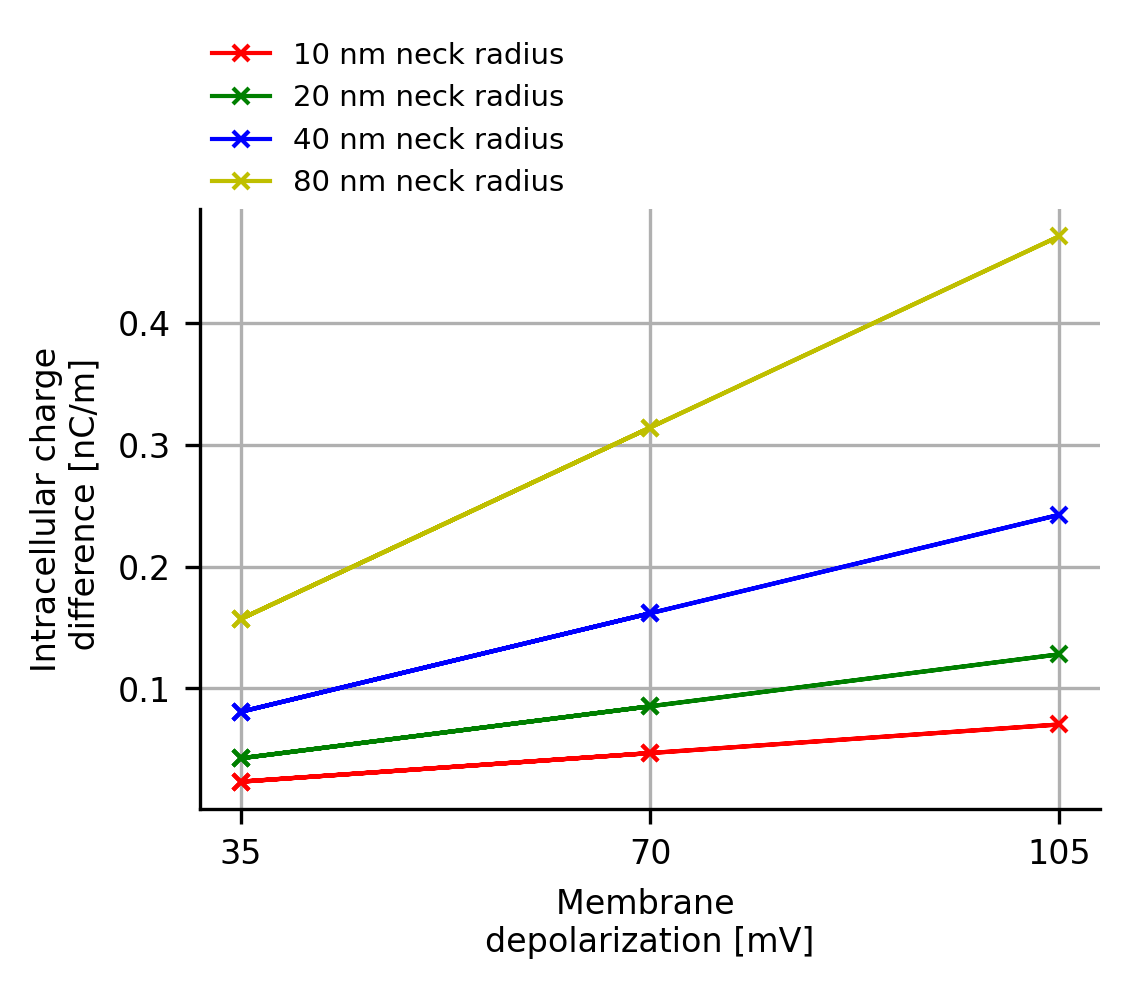

In [13]:

def ax_linear_cap_charging(fig, pos, domain):
    
    ax = fig.add_axes(pos)
    

    if domain == 'head':
        radii = [10,20, 40, 80, 160]
    elif domain == 'neck':
        radii = [10,20, 40, 80]
        
    for col, r_i in zip(['r','g','b','y','k'],radii):
        r_in = r_i * 1e-9

        dv = []
        dc = []

        for i, v_i in enumerate([-0.07, -0.035, 0.0, 0.035]):
            for j, v_j in enumerate([-0.07, -0.035, 0.0, 0.035]):
                #print(domain, r_in, v_i, v_j)
                if v_i > v_j:
                    id_1 = pnp.search_index(df, {'domain':domain, 'r_in':r_in, 'membrane_potential':v_i})[0]
                    id_2 = pnp.search_index(df, {'domain':domain, 'r_in':r_in, 'membrane_potential':v_j})[0]
                    charge_1 = pnp.excess_charge(df, id_1)
                    charge_2 = pnp.excess_charge(df, id_2)
                    #print(v_i-v_j, charge_1 - charge_2)
                    # d_charge = get_charge_diff(...)
                    dv.append((v_i-v_j)*1.e3)
                    dc.append((charge_1 - charge_2)*1.e9)
        
        dv = np.array(dv)
        dc = np.array(dc)
        #ax.loglog(dv, dc, 'k-', marker='x' )
        ax.plot(dv, dc, marker='x', lw=1., color=col, ms=4, label=str(int(r_in*1.e9))+' nm neck radius')
                    
    #ax.set_xticks([35,70,110])
    
    ax.grid(True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xticks((35,70,105))
    ax.set_xticklabels((35,70,105))
    ax.minorticks_off()
    ax.tick_params(labelsize=8)
    
    ax.set_xlabel('Membrane \ndepolarization [mV]', fontsize=8)
    if domain == 'neck':
        ax.set_ylabel('Intracellular charge\n difference [nC/m]', fontsize=8)
    elif domain == 'head':
        ax.set_ylabel('Intracellular charge\n difference [nC]', fontsize=8)
        
    ax.legend(fontsize=7, frameon=False, loc=(0.,1.))
    
fig = plt.figure(dpi=300, figsize=(3,2))
pos = [0,0,1,1]
ax_linear_cap_charging(fig, pos, domain='neck')
plt.show()

greenyellow -0.07
gold -0.035
darkorange 0.0
red 0.035
greenyellow -0.07
gold -0.035
darkorange 0.0
red 0.035


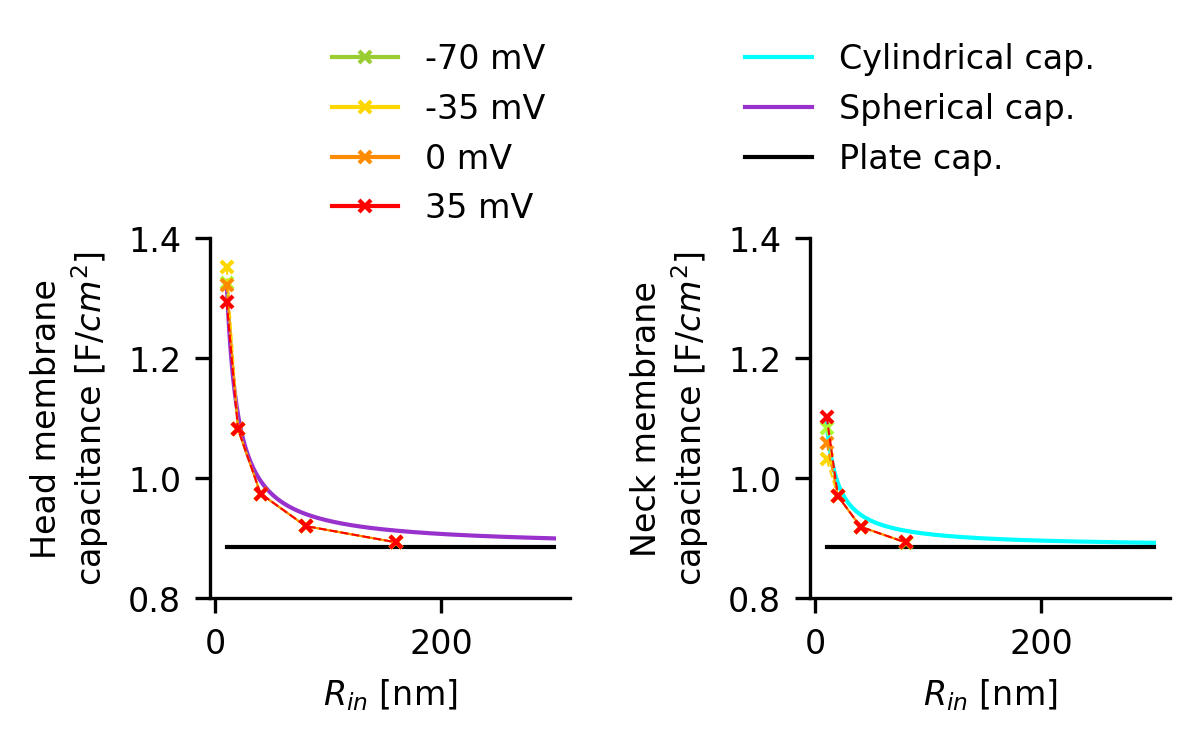

In [11]:
def cylindrical_capacitance_theory(r, d=5.e-9, eps_r=5.):
    """
    capacitance per unit length
    """
    eps_0 = float(constants['eps_0'])
    l = 1.e-6   # length, arbitrary
    
    a = r  # inner radius
    b = r + d  # outer radius
    surface = 2 * np.pi * a * l
    c = 2. * np.pi * eps_0 * eps_r * l/ np.log(b/a)
    c = c/ surface # per unit length, actually not needed if l=1.
    return c
    
def spherical_capacitance_theory(r, d=5e-9, eps_r=5.):
    """
    capacitance normilaized by INTRACELLULAR surface
    """
    eps_0 = float(constants['eps_0'])

    
    surface = 4 * np.pi * np.square(r)
    c = 4. * np.pi * eps_0 * eps_r / (1./r - 1./(r+d) )
    c_surf = c/surface
    return c_surf

def plate_capacitor_theory(r, d=5e-9, eps_r=5.):
    eps_0 = float(constants['eps_0'])
    
    c_surf = np.ones(np.size(r))
    c_surf = c_surf * eps_0 * eps_r / d
    return c_surf
    
def mebrane_capacitance_per_surface(df, id_1, id_2, side='intracellular'):
    # TODO compare parameters of both domains
    
    if side == 'intracellular':
        r = df.loc[id_1, 'r_in']
    else:
        raise AssertionError('extracellular not yet implemented')
    
    if df.loc[id_1, 'domain'] == 'head':
        v_mem_1 = df.loc[id_1, 'membrane_potential']
        v_mem_2 = df.loc[id_2, 'membrane_potential']
        dV = np.abs(v_mem_1 - v_mem_2)
        surface = 4. * np.pi * np.square(r)
        dQ = pnp.capacitance_charges(df, id_1, id_2)
        c = dQ / dV /surface 
        
    if df.loc[id_1, 'domain'] == 'neck':
        v_mem_1 = df.loc[id_1, 'membrane_potential']
        v_mem_2 = df.loc[id_2, 'membrane_potential']
        dV = np.abs(v_mem_1 - v_mem_2)
        
        
        circumfence = 2. * np.pi * r
        dQ = pnp.capacitance_charges(df, id_1, id_2)
        c = dQ / dV / circumfence 
    
    return c

def plot_membrane_cap(fig, pos, domain='head'):
    ax = fig.add_axes(pos)
    
    r = np.linspace(10e-9, 300e-9, 1000, endpoint=True)
    if domain == 'head':
        ax.plot(r, spherical_capacitance_theory(r)*100, label='Spherical capacitor', c='darkorchid', lw=1)
    elif domain == 'neck':
        ax.plot(r, cylindrical_capacitance_theory(r)*100, label='Cylindrical capacitor', c='cyan', lw=1)
    ax.plot(r, plate_capacitor_theory(r)*100, label='Plate capacitor', c='k', lw=1)

    
    
    colors=['greenyellow', 'gold', 'darkorange', 'red']

    if domain == 'head':
        radii = [10,20, 40, 80, 160]
    elif domain == 'neck':
        radii = [10,20, 40, 80]
    for j, v in enumerate([-0.07, -0.035, 0.0, 0.035]):
        v_max = round(v + 0.001, 5)
        v_min = round(v - 0.001, 5)

        r_list = []
        cap_list = []

        for r_i in radii:
            r_in = r_i * 1e-9

            id_1 = pnp.search_index(df, {'domain':domain, 'r_in':r_in, 'membrane_potential':v_max})[0]
            id_2 = pnp.search_index(df, {'domain':domain, 'r_in':r_in, 'membrane_potential':v_min})[0]
            #print(id_1)
            c = np.abs(mebrane_capacitance_per_surface(df, id_1, id_2))

            r_list.append(r_in)
            cap_list.append(c*100) ## unit F/cm^2
        print(colors[j],v)
        ax.plot(r_list, cap_list, 'rx', color=colors[j], lw=.5, zorder=5,
                 ms=3., ls='--', label='PNP, $v_{mem}$ = '+str(int(v*1000))+' mV',)
        
    x_ticklabels = np.array(ax.get_xticks() * 1.e9, dtype=np.int)
    ax.set_xticklabels(x_ticklabels)
    ax.set_xlabel('$R_{in}$ [nm]', fontsize=8)
    
    if domain == 'head':
        ax.set_ylabel('Head membrane\ncapacitance [F/$cm^2$]', fontsize=8)
    if domain == 'neck':
        ax.set_ylabel('Neck membrane\ncapacitance [F/$cm^2$]', fontsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim([0.008*100, 0.014*100])
    #ax.set_title(domain)
    
    ax.tick_params(labelsize=8)
    if domain == 'head':
        # LEGEND
        from matplotlib.lines import Line2D
        custom_lines = [
            Line2D([0], [0], color='yellowgreen', lw=1, ms=3, marker='x'),
            Line2D([0], [0], color='gold', lw=1, ms=3, marker='x'),
            Line2D([0], [0], color='darkorange', lw=1, ms=3, marker='x'),
            Line2D([0], [0], color='red', lw=1, ms=3, marker='x'),
            Line2D([0], [0], color='cyan', lw=1, ),
            Line2D([0], [0], color='darkorchid', lw=1,),
            Line2D([0], [0], color='k', lw=1),
            ]
        ax.legend(custom_lines, ['-70 mV', '-35 mV', '0 mV', '35 mV',
                                'Cylindrical cap.', 'Spherical cap.', 'Plate cap.'],
                  frameon=False, loc=(0.3,1.), fontsize=8, ncol=2,
                 columnspacing=6)
    #ax.legend(fontsize=4, frameon=False)
    
#####################
fig_cap = plt.figure(figsize=(4., 1.5), dpi=300)

plot_membrane_cap(fig_cap, [0.1, 0.1, 0.3, 0.8])
plot_membrane_cap(fig_cap, [0.6, 0.1, 0.3, 0.8], domain='neck')

plt.show()

charge per length in neck domain: 
radius:  2e-08
PNP 2.3475708418019307e-08
cable:  2.1215397614451748e-08
relative increase:  0.1065410530900375
radius:  4e-08
PNP 8.938927767425247e-08
cable:  8.486159045780699e-08
relative increase:  0.053353786937290995
radius:  8e-08
PNP 3.4850912041308783e-07
cable:  3.3944636183122797e-07
relative increase:  0.026698646976118855
radius:  1e-08
PNP 6.430760914201876e-09
cable:  5.303849403612937e-09
relative increase:  0.21247049545209495
charge per length in neck domain: 
0.01174542143108401 0.010237825257734992
0.01174542143108401 0.010237825257734992
double layer size:  7.716615224887987e-10
0.011681500012676992 0.010213888176704529
0.011681500012676992 0.010213888176704529
double layer size:  7.647906526931611e-10
0.011734626713300824 0.010290913020440997
0.011734626713300824 0.010290913020440997
double layer size:  7.572283987081723e-10
0.01173987770652491 0.01016643675117454
0.01173987770652491 0.01016643675117454
double layer size:  7.921

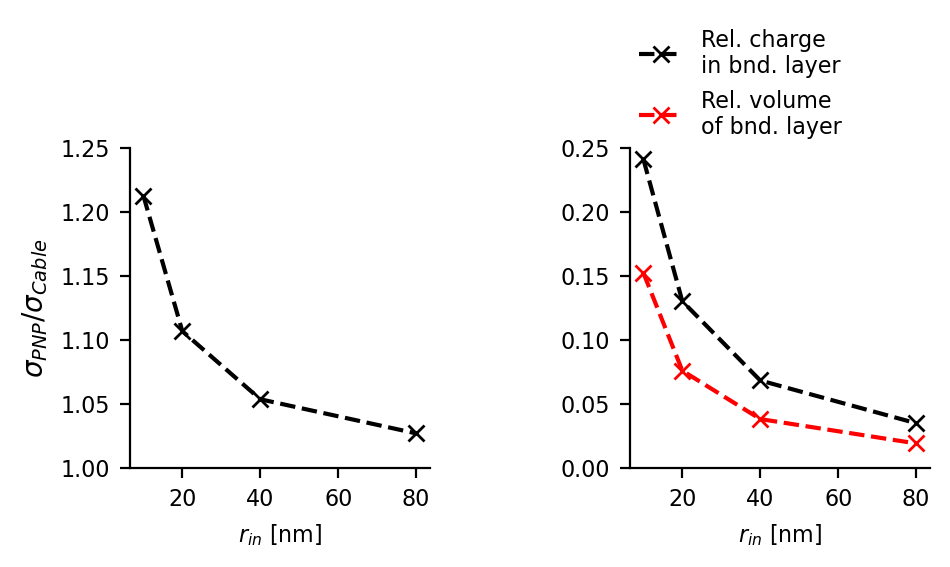

In [12]:
def plot_neck_resistance_change(fig, pos, df, neck_ids):
    ax = fig.add_axes(pos)
    
    N_A = float(constants['N_A'])
    e = float(constants['e'])

    print('charge per length in neck domain: ')
    
    radii = []
    pnp_charge = []
    cable_charge = []

    for neck_id in neck_ids:
        r = df.loc[neck_id, 'r_in']
        print('radius: ',r)
        radii.append(r)

        pnp_charge_per_length = pnp.free_charge(df, neck_id)
        pnp_charge.append(pnp.free_charge(df, neck_id))
        print('PNP', pnp_charge_per_length)

        cPos = df.loc[neck_id, 'c_pos_in_0']
        cNeg = df.loc[neck_id, 'c_neg_in_0']
        cable_charge_per_length = (cPos+cNeg)*N_A *e*np.pi*r*r
        print('cable: ', cable_charge_per_length)
        cable_charge.append(cable_charge_per_length)

        rel_change = (pnp_charge_per_length - cable_charge_per_length) / cable_charge_per_length
        print('relative increase: ', rel_change)
     
    # sort by radius
    radii = np.array(radii)
    pnp_charge = np.array(pnp_charge)
    cable_charge = np.array(cable_charge)
    sort_indices = np.argsort(radii)
    radii = radii[sort_indices]
    pnp_charge = pnp_charge[sort_indices]
    cable_charge = cable_charge[sort_indices]
    
    #ax.plot(radii, pnp_charge)
    #ax.plot(radii, cable_charge)
    ax.plot(radii, np.array(pnp_charge)/np.array(cable_charge), 'kx', ls='--')
    
    #####
    # style
    ax.set_ylim(1., 1.25)
    ax.tick_params(labelsize=8)
    
    x_ticklables = np.array(ax.get_xticks() * 1.e9, dtype=np.int)
    ax.set_xticklabels(x_ticklables)
    ax.set_xlabel('$r_{in}$ [nm]', fontsize = 8)
    ax.set_ylabel('$\sigma_{PNP}$/$\sigma_{Cable}$')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    
def plot_rel_charge_in_bnd_layer(fig, pos, df, neck_ids):
    
    dl_factor = 1.  # mulitplicative scale of debye layer size
    
    ax = fig.add_axes(pos)
    
    N_A = float(constants['N_A'])
    e = float(constants['e'])

    print('charge per length in neck domain: ')
    
    radii = []
    bnd_charge = []
    intracell_charge = []
    dl_size = []
    
    for neck_id in neck_ids:
        dls = np.mean(pnp.measure_double_layer_size(df, neck_id, side='intracellular')) * dl_factor
        dl_size.append(dls)
        bnd_charge.append(pnp.double_layer_free_charge(df, neck_id, dl_factor=dl_factor))
        radii.append(df.loc[neck_id, 'r_in'])
        intracell_charge.append(pnp.free_charge(df, neck_id))
        
    radii = np.array(radii)
    bnd_charge = np.array(bnd_charge)
    intracell_charge = np.array(intracell_charge)
    dl_size = np.array(dl_size)
    # sort by radius
    sort_indices = np.argsort(radii)
    radii = radii[sort_indices]
    bnd_charge = bnd_charge[sort_indices]
    intracell_charge = intracell_charge[sort_indices]
    dl_size = dl_size[sort_indices]
    
    ax.plot(radii, bnd_charge/intracell_charge, 'kx', label='Rel. charge \nin bnd. layer', ls='--')
    
    
    
    dl_volume = np.square(radii) - np.square(radii - dl_size)
    volume_ratio = dl_volume / np.square(radii)
    ax.plot(radii, volume_ratio, 'rx', label='Rel. volume \nof bnd. layer', ls='--')
    
    ###### style
    ax.set_ylim(0, 0.25)
    ax.legend(fontsize=8, frameon=False, loc=(0.,1.))
    
    ax.tick_params(labelsize=8)
    
    x_ticklables = np.array(ax.get_xticks() * 1.e9, dtype=np.int)
    ax.set_xticklabels(x_ticklables)
    ax.set_xlabel('$r_{in}$ [nm]', fontsize=8)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
#######################

neck_ids = pnp.search_index(df, {'domain':'neck', 'membrane_potential':-0.07})    
fig = plt.figure(figsize=(5,2), dpi=200)

plot_neck_resistance_change(fig, [0.1,0.1,0.3,0.8], df, neck_ids)

plot_rel_charge_in_bnd_layer(fig, [0.6, 0.1, 0.3, 0.8], df, neck_ids)

plt.show()

figsize:  7.15 4.95


<ipython-input-8-cc0aa0bb7976>:24: RuntimeWarning: invalid value encountered in true_divide
  c_pos_diff = (c_pos_2 - c_pos_1) / c_pos_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:25: RuntimeWarning: invalid value encountered in true_divide
  c_neg_diff = (c_neg_2 - c_neg_1) / c_neg_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:24: RuntimeWarning: invalid value encountered in true_divide
  c_pos_diff = (c_pos_2 - c_pos_1) / c_pos_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:25: RuntimeWarning: invalid value encountered in true_divide
  c_neg_diff = (c_neg_2 - c_neg_1) / c_neg_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:24: RuntimeWarning: invalid value encountered in true_divide
  c_pos_diff = (c_pos_2 - c_pos_1) / c_pos_2 * 100. # [%]
<ipython-input-8-cc0aa0bb7976>:25: RuntimeWarning: invalid value encountered in true_divide
  c_neg_diff = (c_neg_2 - c_neg_1) / c_neg_2 * 100. # [%]


greenyellow -0.07
gold -0.035
darkorange 0.0
red 0.035
greenyellow -0.07
gold -0.035
darkorange 0.0
red 0.035
charge per length in neck domain: 
radius:  2e-08
PNP 2.3475708418019307e-08
cable:  2.1215397614451748e-08
relative increase:  0.1065410530900375
radius:  4e-08
PNP 8.938927767425247e-08
cable:  8.486159045780699e-08
relative increase:  0.053353786937290995
radius:  8e-08
PNP 3.4850912041308783e-07
cable:  3.3944636183122797e-07
relative increase:  0.026698646976118855
radius:  1e-08
PNP 6.430760914201876e-09
cable:  5.303849403612937e-09
relative increase:  0.21247049545209495
charge per length in neck domain: 
0.01174542143108401 0.010237825257734992
0.01174542143108401 0.010237825257734992
double layer size:  7.716615224887987e-10
0.011681500012676992 0.010213888176704529
0.011681500012676992 0.010213888176704529
double layer size:  7.647906526931611e-10
0.011734626713300824 0.010290913020440997
0.011734626713300824 0.010290913020440997
double layer size:  7.572283987081723

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


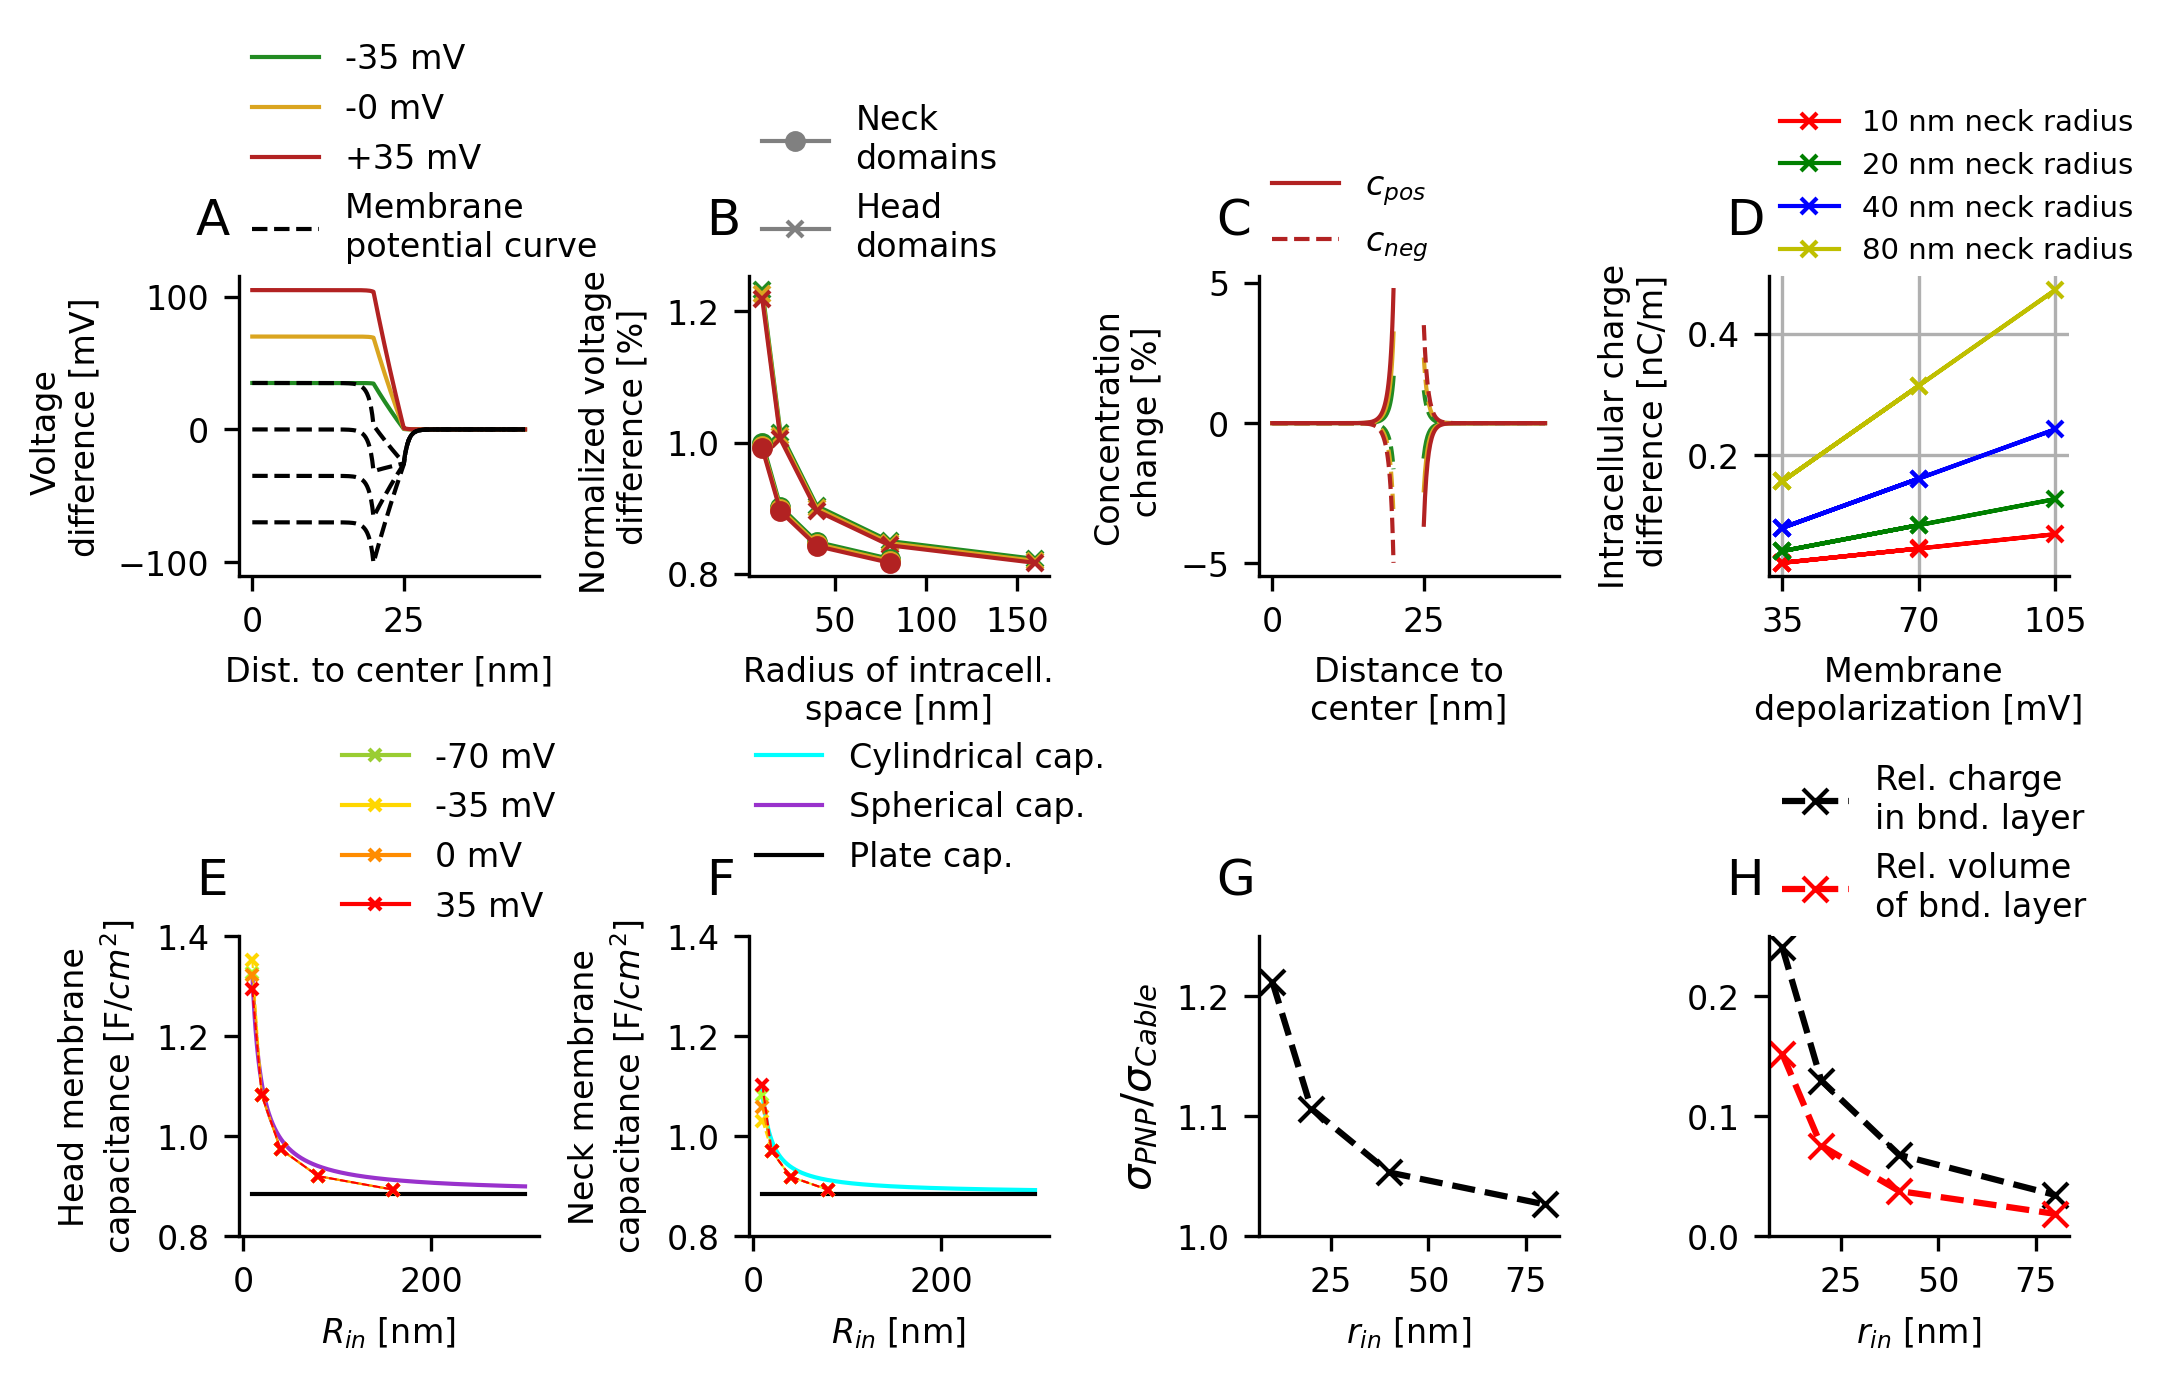

In [14]:
dx=0.7
dy=0.5
legh1 = 0.7
legh2 = 1.0
ax_width = 1.
ax_height = ax_width

fig_width = 4.5 * dx + 4 * ax_width

fig_height = 2.5 * dy + 2 * ax_height + legh1 + legh2

x1, x2, x3, x4 = ( ((i+1)*dx+i*ax_width)/fig_width for i in range(4))
y1 = dy / fig_height
y2 = (2*dy + ax_height + legh1) / fig_height
wx = ax_width /fig_width
wy = ax_height /fig_height

pos1 = [x1, y2, wx, wy]
pos2 = [x2, y2, wx, wy]
pos3 = [x3, y2, wx, wy]
pos4 = [x4, y2, wx, wy]
pos5 = [x1, y1, wx, wy]
pos6 = [x2, y1, wx, wy]
pos7 = [x3, y1, wx, wy]
pos8 = [x4, y1, wx, wy]

print('figsize: ', fig_width, fig_height)

#######################

fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)


# A
voltage_drop_along_cylinder_axis(fig, pos1, index_ref=61, index1=64, index2=67, index3=70)

# B
axB = max_voltage_drop_along_cylinder_axis(fig, pos2)

# C 
concentration_changes(fig, pos3, index1=61, index2=70)

# D
ax_linear_cap_charging(fig, pos4, domain='neck')

# E&F
plot_membrane_cap(fig, pos5)
plot_membrane_cap(fig, pos6, domain='neck')

# G&H
neck_ids = pnp.search_index(df, {'domain':'neck', 'membrane_potential':-0.07})    
plot_neck_resistance_change(fig, pos7, df, neck_ids)
plot_rel_charge_in_bnd_layer(fig, pos8, df, neck_ids)

dxt=-0.02
dyt=0.23
fig.text(pos1[0]+dxt,pos1[1]+dyt,'A',fontsize=12)
fig.text(pos2[0]+dxt,pos2[1]+dyt,'B',fontsize=12)
fig.text(pos3[0]+dxt,pos3[1]+dyt,'C',fontsize=12)
fig.text(pos4[0]+dxt,pos4[1]+dyt,'D',fontsize=12)
fig.text(pos5[0]+dxt,pos5[1]+dyt,'E',fontsize=12)
fig.text(pos6[0]+dxt,pos6[1]+dyt,'F',fontsize=12)
fig.text(pos7[0]+dxt,pos7[1]+dyt,'G',fontsize=12)
fig.text(pos8[0]+dxt,pos8[1]+dyt,'H',fontsize=12)


plt.savefig('./../../../../PaperSpineElectrodiffusion/figures/ion_concentrations/Figure03.png')
plt.savefig('./../../../../PaperSpineElectrodiffusion/figures/ion_concentrations/Figure03.tif')
plt.savefig('./../../../../PaperSpineElectrodiffusion/figures/ion_concentrations/Figure03.eps')
plt.show()

# Figure 03
Effect of membrane charge and geometry on cable parameters

    a) difference of voltage with different membrane potentials is constant as function of distance to center of a cylinder.
    b) Max. change of voltage in in intracell and extracell domain is always smaller then ## mV. This indicates that current flow along a cylinder with varying membrane potential does not depend on proximity to membrane.
    c) difference in concentration profiles compared to physiological intracell. concentrations for different membrane potentials. Ion-concentration change only a the membrane and reflect charging and discharging of the capacitance.
    d) show linearity of absolute charge inflow/outflow as function of voltage. This is characteristic for a plate capacitor where C=Q/U.
       evtl show how profiles change es a function of radius of domain (important: consider numerical accuracy)
    e) head: membrane capacitance for different radii and voltages 
    f) neck: membrane capacitance for different radii and voltages 
    g) normalized conductivity along cylinder as function of radius for different voltages
    h) ratio charges in boundary layer